In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Colonnes où des zéros sont anormaux
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les 0 par NaN pour les traiter ensuite
df[cols_with_zero] = df[cols_with_zero].replace(0, pd.NA)

# Vérifier les valeurs manquantes
df.isna().sum()



,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
#Remplir les valeurs manquantes (avec la médiane)
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())

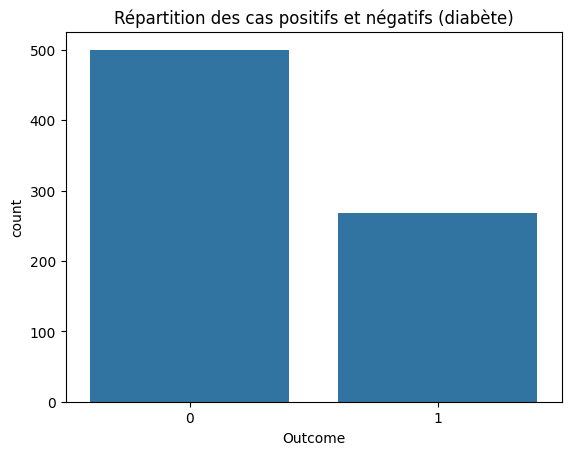

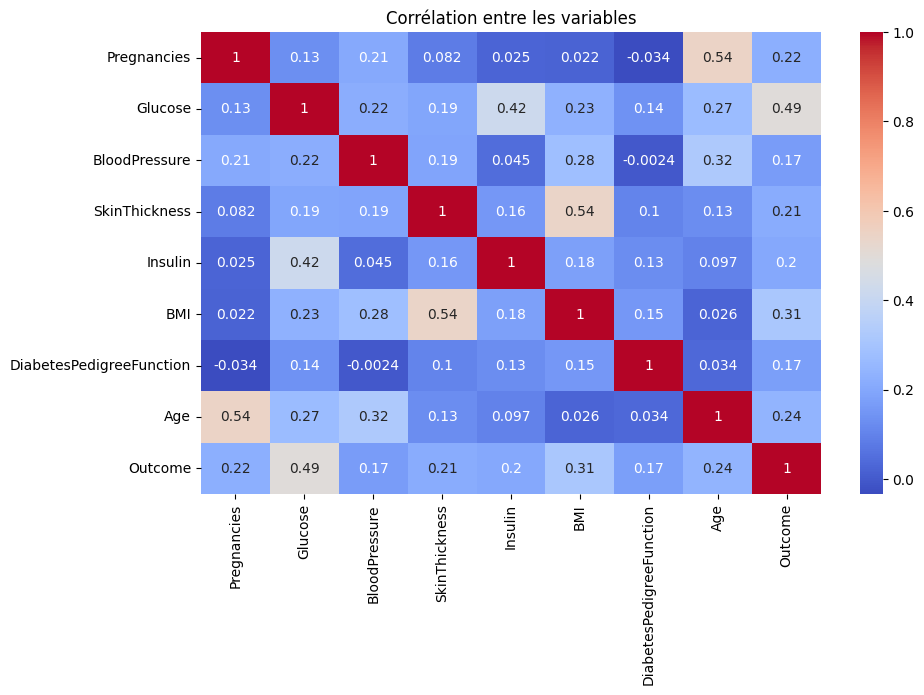

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nombre de positifs / négatifs
sns.countplot(data=df, x='Outcome')
plt.title("Répartition des cas positifs et négatifs (diabète)")
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 60% train, 20% validation, 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred_val = model.predict(X_val_scaled)

print("Validation - Régression Logistique")
print("Accuracy :", accuracy_score(y_val, y_pred_val))
print("Precision:", precision_score(y_val, y_pred_val))
print("Recall   :", recall_score(y_val, y_pred_val))
print("F1-score :", f1_score(y_val, y_pred_val))


Validation - Régression Logistique
Accuracy : 0.7792207792207793
Precision: 0.7272727272727273
Recall   : 0.5925925925925926
F1-score : 0.6530612244897959



Test set
Accuracy : 0.7077922077922078
Precision: 0.6
Recall   : 0.5
F1-score : 0.5454545454545454


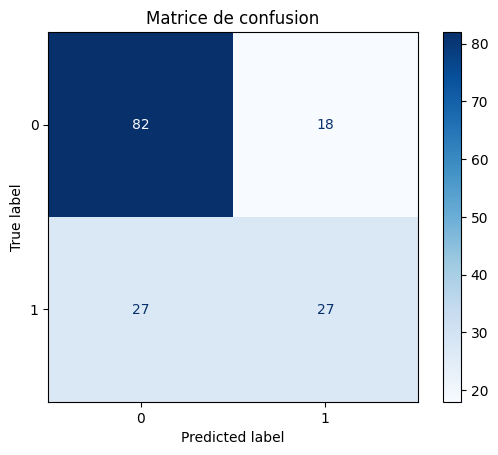

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = model.predict(X_test_scaled)

print("\nTest set")
print("Accuracy :", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall   :", recall_score(y_test, y_pred_test))
print("F1-score :", f1_score(y_test, y_pred_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


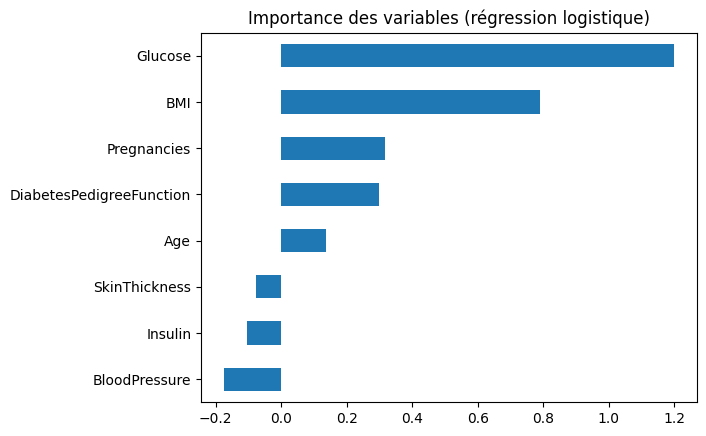

In [14]:
import numpy as np

coeffs = pd.Series(model.coef_[0], index=X.columns)
coeffs.sort_values().plot(kind='barh', title="Importance des variables (régression logistique)")
plt.show()
